# ML Project: Diamond Quality


Eric López & Mustapha El Aichouni


First, we import the necessary libraries for the project


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from src.logreg import LogReg

After this we preprocess the data to make sure there are no missing values and to properly work with the dataset

In [2]:
def basic_preprocessing(df: pd.DataFrame):
	le_cut = LabelEncoder()
	le_color = LabelEncoder()
	le_clarity = LabelEncoder()
	df["cut"] = le_cut.fit_transform(df["cut"])
	df["color"] = le_color.fit_transform(df["color"])
	df["clarity"] = le_clarity.fit_transform(df["clarity"])
	y = df["cut"]
	X = df.drop(columns=["cut", "Unnamed: 0"])
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(X.to_numpy())
	return X_scaled, y, scaler

In [4]:
df = pd.read_csv("data/diamonds.csv")
X, y, scaler = basic_preprocessing(df)
model = LogReg(scaler = scaler, epsilon = .0001, random_state = 42, penalty = "l2", max_iter = 10000)

In [5]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

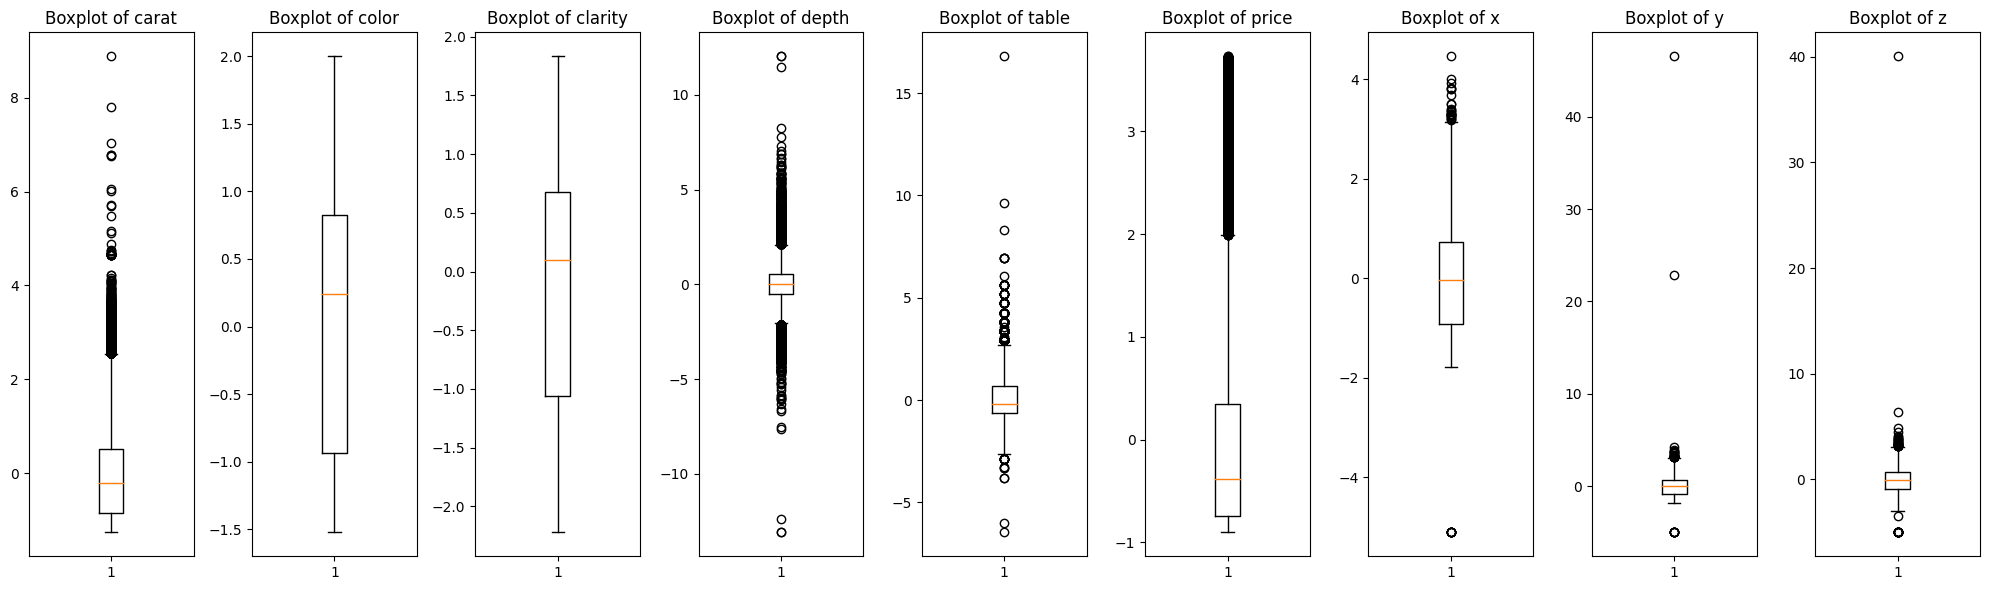

In [6]:
import matplotlib.pyplot as plt

features = ['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

plt.figure(figsize=(20, 6))  # Adjust the size as needed

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.boxplot(x=X[:,i])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [7]:
df2 = pd.DataFrame(X, columns=features)

for feature in features:
	Q1 = df2[feature].quantile(0.25)
	Q3 = df2[feature].quantile(0.75)
	IQR = Q3 - Q1

	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR

	df2 = df2[(df2[feature] >= lower_bound) & (df2[feature] <= upper_bound)]


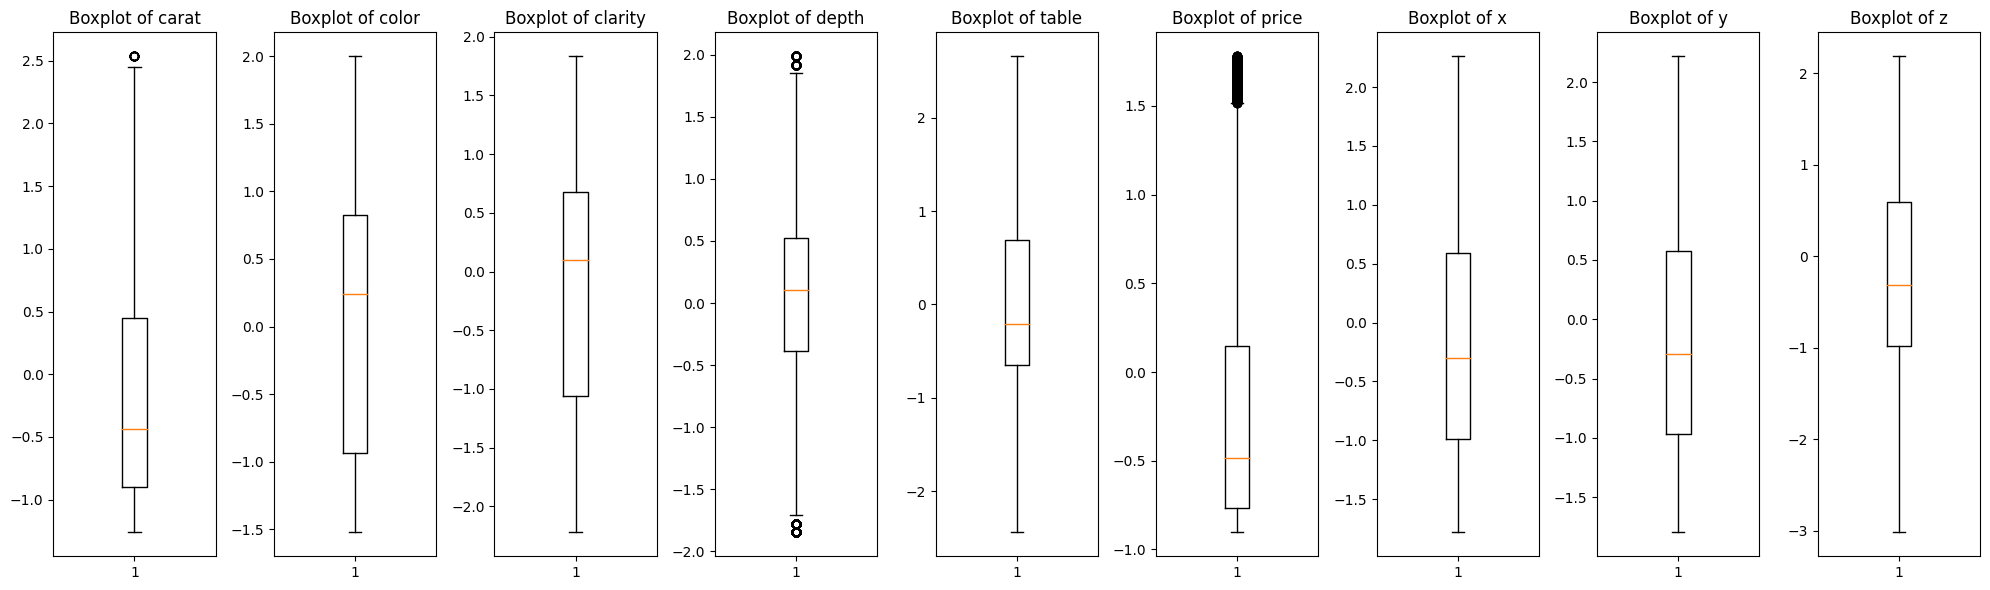

In [8]:
plt.figure(figsize=(20, 6))  # Adjust the size as needed

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.boxplot(x=df2[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [9]:
pd.DataFrame(X, columns=features).describe()

,carat,color,clarity,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-1.338360e-16,-8.852145e-17,-3.996902e-15,9.695207e-17,-9.273676e-17,2.782103e-16,-8.430615e-17,-2.002271e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.525021e+00,-2.223823e+00,-1.308760e+01,-6.470073e+00,-9.040952e-01,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-9.371628e-01,-1.064117e+00,-5.231053e-01,-6.521385e-01,-7.476808e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,2.385547e-01,9.558866e-02,3.531678e-02,-2.046051e-01,-3.839672e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,8.264134e-01,6.754416e-01,5.239361e-01,6.904618e-01,3.487866e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,2.002131e+00,1.835148e+00,1.204139e+01,1.680167e+01,3.732438e+00,4.465203e+00,4.654965e+01,4.004758e+01


In [10]:
df2.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,46377.000000,46377.000000,46377.000000,46377.000000,46377.000000,46377.000000,46377.000000,46377.000000,46377.000000
mean,-0.211264,-0.034644,0.030110,0.044715,-0.101370,-0.234254,-0.187765,-0.182955,-0.176927
std,0.763617,0.990898,1.003257,0.744847,0.899504,0.651313,0.859537,0.839108,0.846227
min,-1.261458,-1.525021,-2.223823,-1.849358,-2.442272,-0.904095,-1.783960,-1.798864,-3.016518
25%,-0.902813,-0.937163,-1.064117,-0.383500,-0.652139,-0.765227,-0.990557,-0.967081,-0.975969
50%,-0.438685,0.238555,0.095589,0.105120,-0.204605,-0.484233,-0.304129,-0.292898,-0.309956
75%,0.447378,0.826413,0.675442,0.523936,0.690462,0.147691,0.587335,0.573908,0.596955
max,2.535955,2.002131,1.835148,1.989794,2.659609,1.780768,2.263287,2.219964,2.184049


---
Now we start with the training and parameter tunning

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from src.logreg import LogReg
import src.utils as utils

In [13]:
df = pd.read_csv("data/diamonds.csv")
X, y, scaler = utils.preprocessing(df)
X.shape, y.shape

((48748, 5), (48748,))

In [14]:
model = LogReg(scaler = scaler, epsilon = .0001, random_state = 42, penalty = "l2", max_iter = 10000)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
model.cross_validation(X_train, y_train, n_splits = 5, test_size = 0.2)  # test_size actually means validation set size here

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


Cross validation (accuracy) scores:
    Logistic Regression -> mean: 0.6383076923076924 std: 0.0018585764384020634


We get a validation score of aprox. 0.64. We will now tune parameters to improve it.  
NOTE: why does it take 1 minute for each split if doing model.fit() takes 0.4 seconds?

In [17]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score

---

Things to take into account in the future:

data structuring: categorical ->numerical

remove outilers

data normalization

split data into training and validation

train models

msouibgui@cvc.uab.cat

---